In [1]:
# Training and Validation data from IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_data.ndim)
print(train_data.shape)
print(train_data.dtype)


1
(25000,)
object


In [3]:
# train_data[0]
print(len(train_data[0]))

218


In [4]:
print(len(train_data[1]))

189


In [5]:
# Key: word, Value: index
word_index = imdb.get_word_index()

# Key: index, Value: word
reversed_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# Decoded review

decoded_review = " ".join(reversed_word_index.get(integer - 3, "?") for integer in train_data[0])


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
"""
## Preparing the data for feeding it into the neural network:

# Option 1: Pad the lists so they all have the same length -> (samples, max_length), and start model with a layer capable of handling such integer tensors (the Embedding layer)

# Option 2: Multi-hot encode the lists to turn them into vectors of 0s and 1s, and then use a Dense layer, capable of handling floating-point vector data, as the first layer in the model.

"""


'\n## Preparing the data for feeding it into the neural network:\n\n# Option 1: Pad the lists so they all have the same length -> (samples, max_length), and start model with a layer capable of handling such integer tensors (the Embedding layer)\n\n# Option 2: Multi-hot encode the lists to turn them into vectors of 0s and 1s, and then use a Dense layer, capable of handling floating-point vector data, as the first layer in the model.\n\n'

In [8]:
# Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  # [[1, 14, 20], [4, 265], ...]]
  # len(sequences) = 25000
  results = np.zeros((len(sequences), dimension)) # shape = (25000, 10000)
  # i is from 0 to 24999
  # sequence is a list of integers for each review
  for i, sequence in enumerate(sequences):
    # iterate over each value in the sequence
    # that is the integer value of the word in the vocabulary for that sequence
    for j in sequence:
      # first review with word index as 14
      # results[0, 14] = 1.
      results[i,j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:



y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
y_train.shape

(25000,)

In [12]:
y_test[0]

np.float32(0.0)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [14]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [15]:
# Setting aside a validation set
x_val = x_train[:10000]
print(x_val.shape) # (10000, 10000)

partial_x_train = x_train[10000:]
print(partial_x_train.shape) # (15000, 10000)


(10000, 10000)
(15000, 10000)


In [16]:
y_val = y_train[:10000]
print(y_val.shape) # (10000,)

partial_y_train = y_train[10000:]
print(partial_y_train.shape) # (15000,)



(10000,)
(15000,)


In [17]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size=512,
          validation_data = (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6944 - loss: 0.6036 - val_accuracy: 0.8645 - val_loss: 0.4064
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8928 - loss: 0.3529 - val_accuracy: 0.8850 - val_loss: 0.3186
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9148 - loss: 0.2556 - val_accuracy: 0.8910 - val_loss: 0.2852
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9371 - loss: 0.1958 - val_accuracy: 0.8856 - val_loss: 0.2852
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9446 - loss: 0.1703 - val_accuracy: 0.8888 - val_loss: 0.2756
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9561 - loss: 0.1429 - val_accuracy: 0.8873 - val_loss: 0.2810
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9640 - loss: 0.1221 - val_accuracy: 0.8868 - val_loss: 0.2908
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9714 - loss: 0.1035 - val_accuracy: 0.8836 - 

In [18]:
print(type(history))
# <class 'keras.src.callbacks.history.History'>

<class 'keras.src.callbacks.history.History'>


In [19]:
history_dict = history.history
print(type(history_dict))

<class 'dict'>


In [22]:
history_dict.keys()
import matplotlib.pyplot as plt

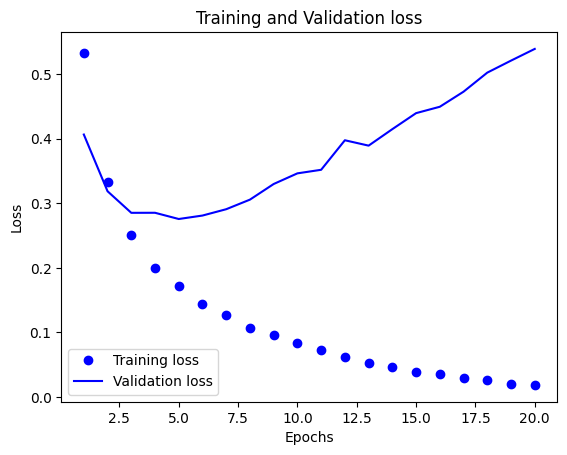

In [23]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+ 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [24]:
plt.clf()

<Figure size 640x480 with 0 Axes>

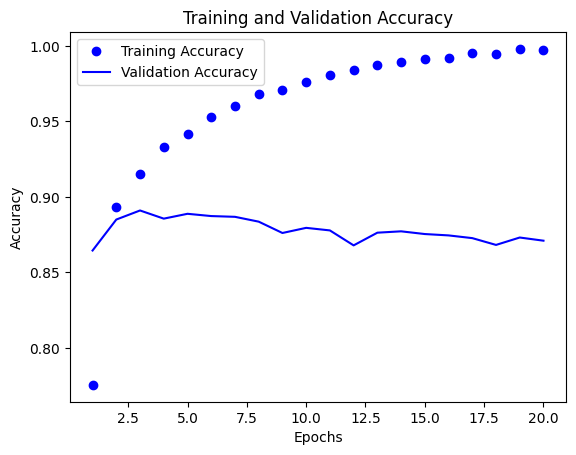

In [25]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
# After 3 epochs, the model is overfitting
# Creating a new model from scratch that uses only 3 epochs

In [27]:
model = keras.Sequential( [
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [28]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [29]:
model.fit(x_train, y_train, epochs = 3, batch_size=512)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7337 - loss: 0.5554
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9043 - loss: 0.2850
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9256 - loss: 0.2158


In [31]:
results = model.evaluate(x_test, y_test)
print(results)
# Loss: 0.284
# Accuracy: 88.41%


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8841 - loss: 0.2869
[0.28480592370033264, 0.8864799737930298]


In [33]:
model.predict(x_test)
print(x_test.shape) # (25000, 10000)



782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(25000, 10000)
